### HOMEWORK 5

### WARNINGS :

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### LIBRARIES :

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import pickle
import random
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
import time
from bayes_opt import BayesianOptimization, UtilityFunction
import random
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tpot import TPOTClassifier
from geneticalgorithm import geneticalgorithm as ga
from sklearn_genetic import GASearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn_genetic.space import Categorical, Integer, Continuous
from hyperopt import hp
from hyperopt.mongoexp import MongoTrials
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from timeit import default_timer as timer
from datetime import timedelta
import time
import pickle
from bayes_opt import BayesianOptimization, UtilityFunction
import os
from sklearn.neural_network import MLPRegressor
from keras.layers import Dense, Dropout

### READ THE DATASET :

In [ ]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,12/31/2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### EDA ON DATASET :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(17379, 17)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
df.std()

instant       5017.029500
season           1.106918
yr               0.500008
mnth             3.438776
hr               6.914405
holiday          0.167165
weekday          2.005771
workingday       0.465431
weathersit       0.639357
temp             0.192556
atemp            0.171850
hum              0.192930
windspeed        0.122340
casual          49.305030
registered     151.357286
cnt            181.387599
dtype: float64

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.00,0.40,0.87,0.49,-0.00,0.01,0.00,-0.00,-0.01,0.14,0.14,0.01,-0.07,0.16,0.28,0.28
season,0.40,1.00,-0.01,0.83,-0.01,-0.01,-0.00,0.01,-0.01,0.31,0.32,0.15,-0.15,0.12,0.17,0.18
yr,0.87,-0.01,1.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.02,0.04,0.04,-0.08,-0.01,0.14,0.25,0.25
mnth,0.49,0.83,-0.01,1.00,-0.01,0.02,0.01,-0.00,0.01,0.20,0.21,0.16,-0.14,0.07,0.12,0.12
hr,-0.00,-0.01,-0.00,-0.01,1.00,0.00,-0.00,0.00,-0.02,0.14,0.13,-0.28,0.14,0.30,0.37,0.39
holiday,0.01,-0.01,0.01,0.02,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,0.00,0.03,-0.05,-0.03
weekday,0.00,-0.00,-0.00,0.01,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,0.01,0.03,0.02,0.03
workingday,-0.00,0.01,-0.00,-0.00,0.00,-0.25,0.04,1.00,0.04,0.06,0.05,0.02,-0.01,-0.30,0.13,0.03
weathersit,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.00,0.04,1.00,-0.10,-0.11,0.42,0.03,-0.15,-0.12,-0.14
temp,0.14,0.31,0.04,0.20,0.14,-0.03,-0.00,0.06,-0.10,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40


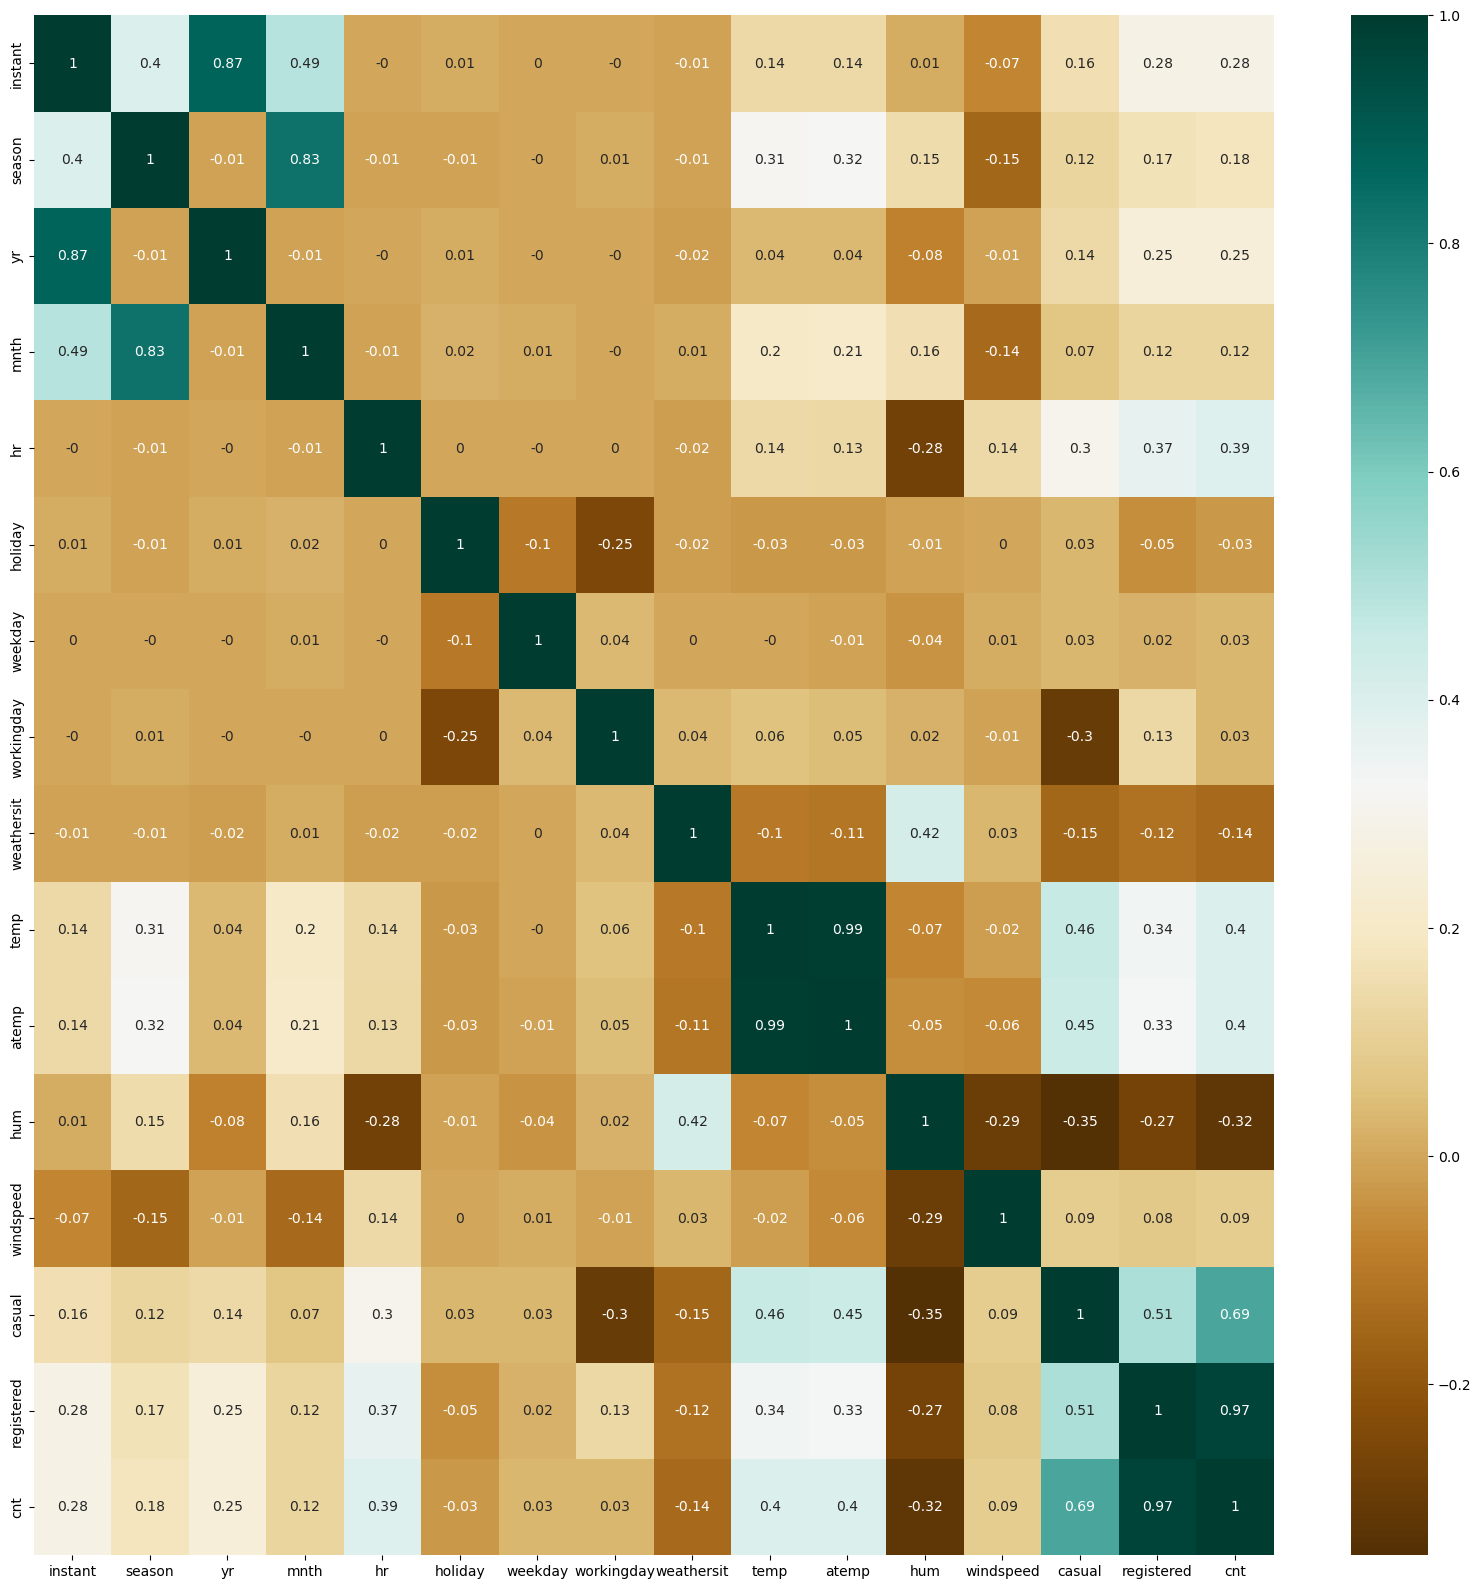

In [ ]:
# plot za korelacija, sakam da vidam kakva povrzanost imam megu kolonite

plt.figure(figsize=(20,20))
c= df.corr().round(2)
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# Gledam od plotot deka korelacijata pomegu kolonite atemp/temp i registered/cnt mi se so
# golema korelacija, pa ke gi izbrisam

col_with_big_corr = ['atemp','registered']
df.drop(columns = col_with_big_corr, inplace=True)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
instant,1.00,0.40,0.87,0.49,-0.00,0.01,0.00,-0.00,-0.01,0.14,0.01,-0.07,0.16,0.28
season,0.40,1.00,-0.01,0.83,-0.01,-0.01,-0.00,0.01,-0.01,0.31,0.15,-0.15,0.12,0.18
yr,0.87,-0.01,1.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.02,0.04,-0.08,-0.01,0.14,0.25
mnth,0.49,0.83,-0.01,1.00,-0.01,0.02,0.01,-0.00,0.01,0.20,0.16,-0.14,0.07,0.12
hr,-0.00,-0.01,-0.00,-0.01,1.00,0.00,-0.00,0.00,-0.02,0.14,-0.28,0.14,0.30,0.39
holiday,0.01,-0.01,0.01,0.02,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.01,0.00,0.03,-0.03
weekday,0.00,-0.00,-0.00,0.01,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.04,0.01,0.03,0.03
workingday,-0.00,0.01,-0.00,-0.00,0.00,-0.25,0.04,1.00,0.04,0.06,0.02,-0.01,-0.30,0.03
weathersit,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.00,0.04,1.00,-0.10,0.42,0.03,-0.15,-0.14
temp,0.14,0.31,0.04,0.20,0.14,-0.03,-0.00,0.06,-0.10,1.00,-0.07,-0.02,0.46,0.40


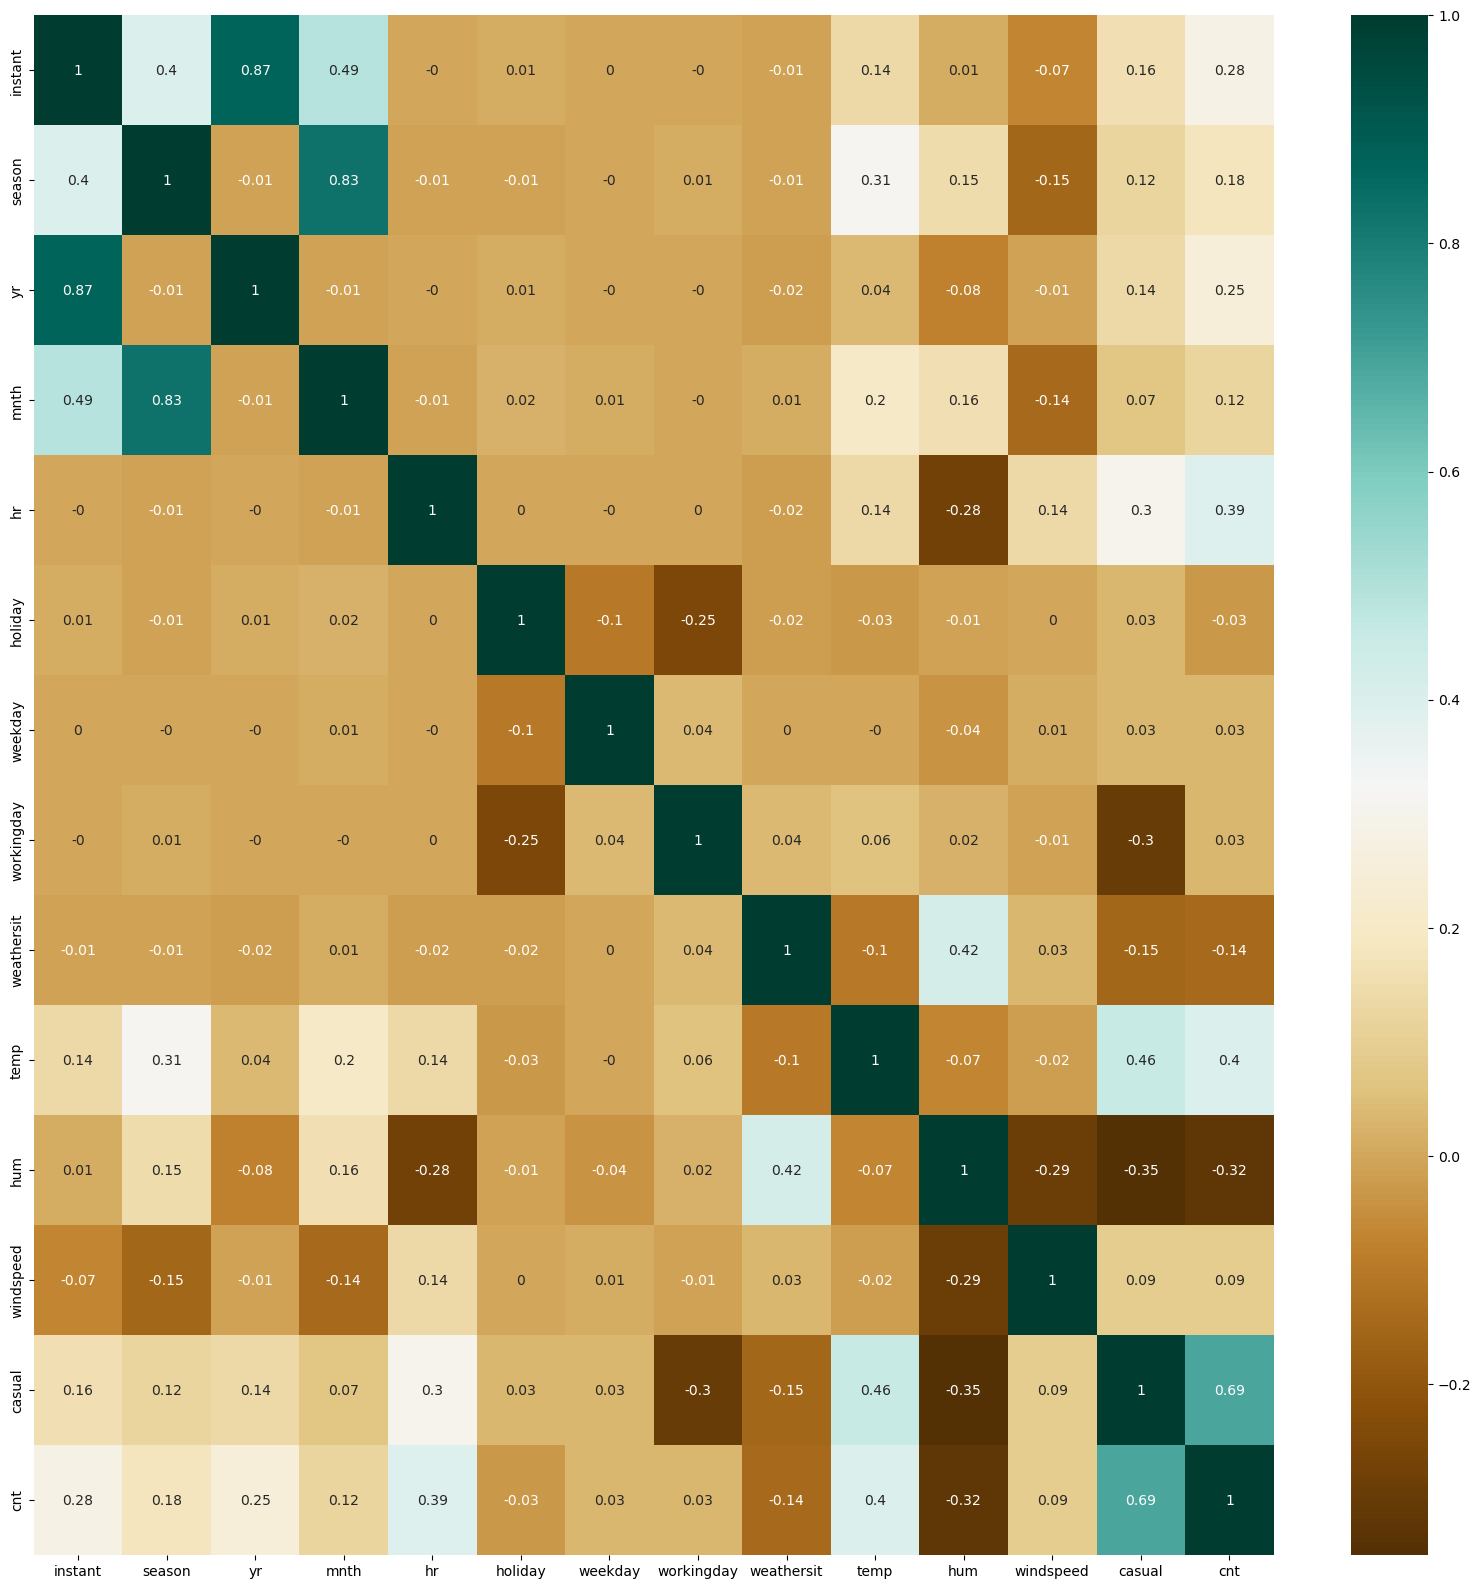

In [ ]:
# proverka

plt.figure(figsize=(20,20))
c= df.corr().round(2)
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# Gi preimenuvam kolonite, da mi bidat pocitki

df = df.rename(columns={'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'weathersit':'weather',
                        'temp':'temperature',
                        'hum':'humidity',
                        'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temperature,humidity,windspeed,casual,count
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [ ]:
# Ovaa kolona na index i datumite ne ni se potrebni, pa zatoa gi brisam.

df.drop(['instant','dteday'], axis = 1, inplace = True)

In [ ]:
# Proverka

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   year         17379 non-null  int64  
 2   month        17379 non-null  int64  
 3   hour         17379 non-null  int64  
 4   holiday      17379 non-null  int64  
 5   weekday      17379 non-null  int64  
 6   workingday   17379 non-null  int64  
 7   weather      17379 non-null  int64  
 8   temperature  17379 non-null  float64
 9   humidity     17379 non-null  float64
 10  windspeed    17379 non-null  float64
 11  casual       17379 non-null  int64  
 12  count        17379 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.7 MB


In [ ]:
# # Gledam kakvi mi se unikatnite vrednosti samo za int vo site koloni.

for column in df.columns:
    if df[column].dtype == 'int64':
        unique_values = df[column].unique()
        print(column, unique_values)

season [1 2 3 4]
year [0 1]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weather [1 2 3 4]
casual [  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  24  28  48  52  42
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  72  76 108  66  60  57  53  61  90 105  98  43  46  80  83  74  37
  70  81 100  99  54  88  97 144 149 124  50  71  67  95 126 174 168 170
 175 138  92 120 145 172  44  75  94  93 110 118  64  56 111  89  69 139
 166 219 240 147 148  78  63  79 114  85 128 121 156 135 103  49  91 119
 167 181 179 161 143 182 171 180 205 197 162 142  96  65  77 178 185 184
 217 191 134 150 109 123 113  86  82 132 129 196 122 106 107 195 183 206
 158 137 173 222 187 232 204 117 164 146 125 201  87 130 216 237 221 194
 214 151 141 116 153 133 101 115 188 19

In [ ]:
# Ovaa kolona ke ja izbrisam, bidejki istite informacii mi gi sodrzi vo kolonata workingday i poradi toa ne mi e potrebna.

df.drop(['holiday'], axis = 1, inplace = True)

In [ ]:
# Proverka

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   year         17379 non-null  int64  
 2   month        17379 non-null  int64  
 3   hour         17379 non-null  int64  
 4   weekday      17379 non-null  int64  
 5   workingday   17379 non-null  int64  
 6   weather      17379 non-null  int64  
 7   temperature  17379 non-null  float64
 8   humidity     17379 non-null  float64
 9   windspeed    17379 non-null  float64
 10  casual       17379 non-null  int64  
 11  count        17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


In [ ]:
# for columns in df.columns:
#     df[columns] = pd.to_numeric(df[columns],errors='coerce').astype(float)

In [ ]:
# # Proverka

# df.info()

In [ ]:
# Definiranje na target/label kolona i koloni atrubuti vo data setot
# atrubut ni e X
# labela/target kolona ni e y

label_column = 'count'

X = df.drop(columns=[label_column])
y = df[label_column]

In [ ]:
# Tuka generirame podatoci za train_valid i testiranje

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,random_state=42)

In [ ]:
# Tuka podatoci od train-valid gi delime na train i na valid

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3,shuffle=True,random_state=42)

In [ ]:
# Tuka gledame kako ni se podeleni podatocite spored train, valid i test.

print("Whole dataset :", len(df))
print("X Train size", len(X_train))
print("y Train size", len(y_train))
print("X Valid size", len(X_valid))
print("y Valid size", len(y_valid))
print("X Test size", len(X_test))
print("y Test size", len(y_test))

Whole dataset : 17379
X Train size 8515
y Train size 8515
X Valid size 3650
y Valid size 3650
X Test size 5214
y Test size 5214


In [ ]:
# Tuka gi standardizirame podatocite vo ist opseg so min/max sclaer-ot

minmax_scaler = preprocessing.MinMaxScaler() 
X_train_scal = minmax_scaler.fit_transform(X_train)
X_valid_scal = minmax_scaler.transform(X_valid)
X_test_scal = minmax_scaler.transform(X_test)

In [ ]:
X_train_scal

array([[0.33333333, 0.        , 0.36363636, ..., 0.59      , 0.1346476 ,
        0.08310249],
       [0.        , 1.        , 0.18181818, ..., 0.94      , 0.21157067,
        0.0166205 ],
       [0.66666667, 1.        , 0.54545455, ..., 0.89      , 0.24996779,
        0.01939058],
       ...,
       [0.        , 0.        , 0.18181818, ..., 0.25      , 0.21157067,
        0.07202216],
       [0.        , 0.        , 0.        , ..., 0.49      , 0.38461538,
        0.00554017],
       [1.        , 0.        , 0.81818182, ..., 0.87      , 0.        ,
        0.04155125]])

In [ ]:
X_valid_scal

array([[0.        , 1.        , 0.09090909, ..., 0.54      , 0.1346476 ,
        0.00277008],
       [0.        , 0.        , 1.        , ..., 0.87      , 0.1346476 ,
        0.01385042],
       [1.        , 1.        , 1.        , ..., 0.88      , 0.        ,
        0.00277008],
       ...,
       [0.        , 1.        , 0.        , ..., 0.77      , 0.21157067,
        0.06648199],
       [0.66666667, 0.        , 0.72727273, ..., 0.72      , 0.21157067,
        0.03878116],
       [1.        , 0.        , 0.90909091, ..., 0.94      , 0.        ,
        0.        ]])

In [ ]:
X_test_scal

array([[0.66666667, 1.        , 0.45454545, ..., 0.27      , 0.24996779,
        0.51246537],
       [0.        , 1.        , 0.        , ..., 0.41      , 0.28849375,
        0.01385042],
       [1.        , 0.        , 0.81818182, ..., 0.66      , 0.36541683,
        0.00277008],
       ...,
       [0.66666667, 1.        , 0.45454545, ..., 0.33      , 0.28849375,
        0.62880886],
       [1.        , 1.        , 1.        , ..., 0.68      , 0.24996779,
        0.10803324],
       [0.        , 1.        , 0.09090909, ..., 0.86      , 0.1346476 ,
        0.        ]])

### BAYESIAN OPTIMIZATION FOR RANDOM FOREST, SVR REGRESSION MODELS (TRAIN AND VALID)

In [ ]:
start_time = time.time()

rf_space = {'n_estimators': (10, 20),
            'max_depth': (2, 10),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 5)}

svr_space = {'C': (0.1, 10),
             'epsilon': (0.01, 1),
             'gamma': (0.001, 0.1)}

def optimize_rf(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model_rf = RandomForestRegressor(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=42)
    
    model_rf.fit(X_train_scal, y_train)
    y_pred = model_rf.predict(X_valid_scal)
    return -mean_absolute_error(y_valid, y_pred)

def optimize_svr(C, epsilon, gamma):
    model_svr = SVR(C=C,
                epsilon=epsilon,
                gamma=gamma)
    
    model_svr.fit(X_train_scal, y_train)
    y_pred = model_svr.predict(X_valid_scal)
    return -mean_absolute_error(y_valid, y_pred)

rf_bayes = BayesianOptimization(f=optimize_rf, pbounds=rf_space)
svr_bayes = BayesianOptimization(f=optimize_svr, pbounds=svr_space)

rf_bayes.maximize(init_points=2, n_iter=3)
svr_bayes.maximize(init_points=2, n_iter=3)

best_params = rf_bayes.max['params']
best_score = rf_bayes.max['target']
print("Best hyperparameters for Random Forest:", best_params)
print("Best score for Random Forest:", best_score)
print("---------------------------------------------------------------")
best_params = svr_bayes.max['params']
best_score = svr_bayes.max['target']
print("Best hyperparameters for SVR:", best_params)
print("Best score for SVR:", best_score)


end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

data = {optimize_rf,optimize_svr}

for value in data:
    if isinstance(value, str):
        data.remove(value)
        data.add(value.encode("utf-8"))

with open("data.pickle", "wb") as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("data.pickle", "rb") as f:
    loaded_data = pickle.load(f)

for value in loaded_data:
    if isinstance(value, bytes):
        loaded_data.remove(value)
        loaded_data.add(value.decode("utf-8"))

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -30.53    | 8.368     | 1.071     | 8.971     | 14.25     |
| 2         | -64.05    | 4.773     | 4.576     | 5.443     | 17.61     |
| 3         | -81.31    | 2.493     | 3.147     | 3.53      | 15.0      |
| 4         | -25.62    | 10.0      | 1.0       | 10.0      | 12.07     |
| 5         | -25.2     | 10.0      | 1.0       | 10.0      | 20.0      |
|   iter    |  target   |     C     |  epsilon  |   gamma   |
-------------------------------------------------------------
| 1         | -106.6    | 2.164     | 0.8012    | 0.03604   |
| 2         | -115.8    | 9.815     | 0.5839    | 0.003945  |
| 3         | -93.98    | 3.53      | 0.1932    | 0.06374   |
| 4         | -78.42    | 8.565     | 0.5513    | 0.0885    |
| 5         | -124.1    | 0.6764    | 0.8947    | 0.03338   |
Best hyperparameters for Random Forest: {'max_de

### BEST MODEL FOR RANDOM FOREST AND SVR ON TEST DATA WITH BAYESIAN OPTIMIZATION

In [ ]:
start_time = time.time()

best_rf_model = RandomForestRegressor(n_estimators=int(rf_bayes.max['params']['n_estimators']),
                                      max_depth=int(rf_bayes.max['params']['max_depth']),
                                      min_samples_split=int(rf_bayes.max['params']['min_samples_split']),
                                      min_samples_leaf=int(rf_bayes.max['params']['min_samples_leaf']),
                                      random_state=42)

best_rf_model.fit(X_train_scal, y_train)
y_pred_rf = best_rf_model.predict(X_test_scal)
test_score_rf = mean_absolute_error(y_test, y_pred_rf)
print("Test score for Random Forest:", test_score_rf)

best_svr_model = SVR(C=svr_bayes.max['params']['C'],
                     epsilon=svr_bayes.max['params']['epsilon'],
                     gamma=svr_bayes.max['params']['gamma'])

best_svr_model.fit(X_train_scal, y_train)
y_pred_svr = best_svr_model.predict(X_test_scal)
test_score_svr = mean_absolute_error(y_test, y_pred_svr)
print("Test score for SVR:", test_score_svr)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

Test score for Random Forest: 24.40319485160074
Test score for SVR: 74.81636019805848
Elapsed time: 0 minutes 9 seconds


### NEURAL NETWORK FOR RANDOM FOREST, SVR REGRESSION MODELS FOR BAYESIAN OPTIMIZATION 

In [ ]:
start_time = time.time()

nn_model = MLPRegressor(hidden_layer_sizes=(10, 30), max_iter=50, random_state=42)

combined_inputs = pd.concat([pd.DataFrame(y_pred_rf), pd.DataFrame(y_pred_svr)], axis=1)

nn_model.fit(combined_inputs, y_test)

y_pred_nn = nn_model.predict(combined_inputs)

mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network MSE:", mse_nn)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

Neural Network MSE: 1485.5566448742031
Elapsed time: 0 minutes 0 seconds


### GENETIC ALGORITHM OPTIMIZATION FOR RANDOM FOREST, SVR REGRESSSION MODELS (TRAIN, VALID AND TEST)

In [ ]:
start_time = time.time()

rf_space = {'n_estimators': Integer(10, 50),
            'max_depth': Integer(2, 10),
            'min_samples_split': Integer(2, 10),
            'min_samples_leaf': Integer(1, 5)}

svr_space = {'C': Continuous(0.1, 10),
             'epsilon': Continuous(0.01, 1),
             'gamma': Continuous(0.001, 0.1)}

rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

cv = StratifiedKFold(n_splits=5, shuffle=True)

rf_opt = GASearchCV(estimator=rf_model,
                     param_grid=rf_space,
                     cv=cv,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1,
                     verbose=True,
                     population_size=5,
                     generations=5)

svr_opt = GASearchCV(estimator=svr_model,
                      param_grid=svr_space,
                      cv=cv,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1,
                      verbose=True,
                      population_size=5,
                      generations=5)

rf_opt.fit(X_train_scal, y_train)
y_pred_rf_valid = rf_opt.predict(X_valid_scal)
y_pred_rf_test = rf_opt.predict(X_test_scal)

svr_opt.fit(X_train_scal, y_train)
y_pred_svr_valid = svr_opt.predict(X_valid_scal)
y_pred_svr_test = svr_opt.predict(X_test_scal)

print("Random Forest:")
print("Best parameters:", rf_opt.best_params_)
print("Best score (validation):", rf_opt.best_score_)
print("MSE on test data:", mean_squared_error(y_test, y_pred_rf_test))

print("\nSVR:")
print("Best parameters:", svr_opt.best_params_)
print("Best score (validation):", svr_opt.best_score_)
print("MSE on test data:", mean_squared_error(y_test, y_pred_svr_test))

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	5     	-2379.22	481.954    	-1773.95   	-2987.65   
1  	10    	-3413.8 	2735.42    	-1773.95   	-8861.9    
2  	10    	-1873.17	243.955    	-1717.5    	-2359.21   
3  	10    	-1759.58	45.3461    	-1717.5    	-1834.8    
4  	10    	-1709.87	6.22521    	-1704.79   	-1717.5    
5  	10    	-1692.1 	2.08054    	-1690.85   	-1696.24   
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	5     	-18666.1	1356.12    	-16288.5   	-20464.8   
1  	10    	-16808.2	1100.54    	-16134.1   	-18993.2   
2  	10    	-16700.5	1071.58    	-16122     	-18840.3   
3  	10    	-16363.4	485.014    	-16120.6   	-17333.5   
4  	10    	-16101.3	37.7151    	-16025.9   	-16120.6   
5  	10    	-16104.7	40.0034    	-16025.9   	-16138     
Random Forest:
Best parameters: {'n_estimators': 40, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}
Best score (validation): -1686.1039755032139
MSE on test data: 1449.9474896471168

SVR:
Best parame

### AUTO MODEL CONSTRUCTION NEURAL NETWORKS

In [ ]:
X_train.shape

(8515, 11)

In [ ]:
input_dim = X_train.shape[1]  

In [ ]:
input_dim

11

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
163/163 [==============================] - 0s 877us/step
Epoch 1/1
8/8 loss: 42605.2578 mean_squared_error: 42605.2578 mean_absolute_error: 146.6821 val_loss: 28090.7656 val_mean_squared_error: 28090.7656 val_mean_absolute_error: 128.4386
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                768   

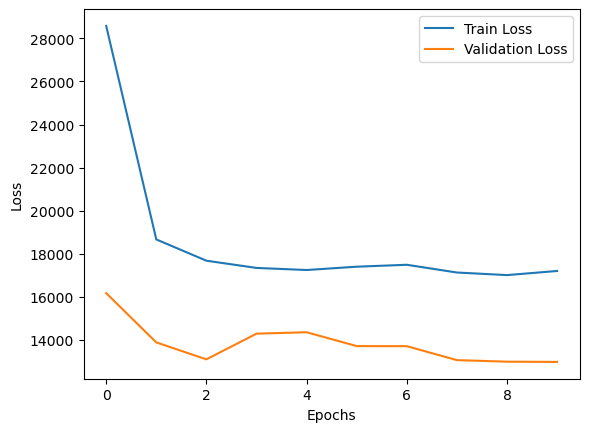

Elapsed time: 75 minutes 52 seconds


In [ ]:
start_time = time.time()

input_dim = 11
dropout_rate = [0.2, 0.4, 0.6]
batch_sizes = [8, 12, 16]
num_epochs = [1, 10]
dense_layers =  [[64], [128, 64], [256, 128, 64], [64, 32], [128, 64, 32]]
activations = ['relu','tanh','selu','relu','linear']

def build_model(input_dim, dense_layers, activation, dropout):
    model = Sequential()
    model.add(Dense(dense_layers[0], activation=activation, input_dim=input_dim))
    for units in dense_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout))
    model.add(Dense(1))
    return model

def train_model(model, X_train_scal, y_train, X_valid_scal, y_valid, batch_size, num_epochs, early_stop):
    callbacks = []
    if early_stop:
        early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
        callbacks.append(early_stop)
    model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
    history = model.fit(X_train_scal, y_train, epochs=num_epochs, batch_size=batch_size,
                        validation_data=(X_valid_scal, y_valid), callbacks=callbacks, verbose=1)
    return history

def evaluate_model(model, X_test_scal, y_test):
    y_pred = model.predict(X_test_scal)
    score = mean_squared_error(y_test, y_pred)
    return score

def visualize_history(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

best_model = None
best_score = float('inf')

report = []

for dropout in dropout_rate:
    for batch_size in batch_sizes:
        for num_epoch in num_epochs:
            for dense_layer in dense_layers:
                for activation in activations:
# for dropout, batch_size, num_epoch, dense_layer, activation in itertools.product(dropout_rate, batch_sizes, num_epochs, dense_layers, activations):                    
                    model = build_model(input_dim, dense_layer, activation, dropout)
                    model.summary()  
                    history = train_model(model, X_train_scal, y_train, X_valid_scal, y_valid, batch_size, num_epoch, early_stop=True)

                    score = evaluate_model(model, X_test_scal, y_test)

                    if score < best_score:
                        best_score = score
                        best_model = model
                    
                    print(f"Epoch {num_epoch}/{num_epoch}")
                    print(f"{batch_size}/{batch_size} loss: {history.history['loss'][-1]:.4f} mean_squared_error: {history.history['mse'][-1]:.4f} mean_absolute_error: {history.history['mae'][-1]:.4f} val_loss: {history.history['val_loss'][-1]:.4f} val_mean_squared_error: {history.history['val_mse'][-1]:.4f} val_mean_absolute_error: {history.history['val_mae'][-1]:.4f}")

                    report.append({'Dropout Rate': dropout,
                                   'Batch Size': batch_size,
                                   'Number of Epochs': num_epoch,
                                   'Dense Layers': dense_layer,
                                   'Activation': activation,
                                   'MSE': score})

report = sorted(report, key=lambda x: x['MSE'])

for entry in report:
    print(f"Dropout Rate: {entry['Dropout Rate']}")
    print(f"Batch Size: {entry['Batch Size']}")
    print(f"Number of Epochs: {entry['Number of Epochs']}")
    print(f"Dense Layers: {entry['Dense Layers']}")
    print(f"Activation: {entry['Activation']}")
    print(f"MSE: {entry['MSE']}")

best_params = report[0]
print("Best Model Parameters:")
print(f"Dropout Rate: {best_params['Dropout Rate']}")
print(f"Batch Size: {best_params['Batch Size']}")
print(f"Number of Epochs: {best_params['Number of Epochs']}")
print(f"Dense Layers: {best_params['Dense Layers']}")
print(f"Activation: {best_params['Activation']}")
print(f"MSE: {best_params['MSE']}")

visualize_history(history)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

#### SE PREGORE GRAFICKATA :)